In [2]:
import pandas as pd
from google.cloud import bigquery
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

sns.set(style='darkgrid', font_scale=1.5)
#sns.set_style('darkgrid', {"xtick.minor.size": 10, "ytick.major.size": 10})
current_palette = sns.color_palette('deep')

In [17]:
%%bigquery df_prior
SELECT *
FROM `usptobias.patstat.tls204`
WHERE prior_appln_id=901564742

In [5]:
df_prior

,appln_id,prior_appln_id,prior_appln_seq_nr
0,9402620,901564742,2
1,15955742,901564742,2
2,1048039,901564742,4
3,330206827,901564742,8
4,48121139,901564742,5
5,330378720,901564742,8
6,324145445,901564742,8
7,375258024,901564742,8
8,50446922,901564742,5
9,9399835,901564742,5


In [10]:
list(df_prior.appln_id)

[9402620,
 15955742,
 1048039,
 330206827,
 48121139,
 330378720,
 324145445,
 375258024,
 50446922,
 9399835,
 13802177,
 1405186,
 15887790,
 51191491,
 23845410,
 273832588,
 49522,
 6762794]

In [11]:
query="""
SELECT *
FROM `usptobias.patstat.tls204`
WHERE prior_appln_id IN UNNEST(@input_list)
"""

params = [
    bigquery.ArrayQueryParameter('input_list', 'NUMERIC', list(df_prior.appln_id))
]

job_config = bigquery.QueryJobConfig()
job_config.query_parameters = params

client = bigquery.Client()

query_job = client.query(query, location='US', job_config=job_config)

df_results_ = query_job.to_dataframe()

In [31]:
%%bigquery df_prior
SELECT *
FROM `usptobias.patstat.tls201`
WHERE appln_id=9399835

In [32]:
df_prior

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_epodoc,appln_nr_original,ipr_type,receiving_office,...,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,9399835,WO,0103747,W,2001-10-01,2001,WO2001DE03747,DE0103747,PI,DE,...,2002-04-04,2002,289659837,False,31892279,26050,11,35,2,1


In [12]:
df_results_

,appln_id,prior_appln_id,prior_appln_seq_nr
0,9402620,9399835,3
1,13802177,9399835,5
2,13064960,9399835,1
3,1048039,9399835,5
4,15955742,9399835,3


In [13]:
query="""
SELECT *
FROM `usptobias.patstat.tls204`
WHERE prior_appln_id IN UNNEST(@input_list)
"""

params = [
    bigquery.ArrayQueryParameter('input_list', 'NUMERIC', list(df_results_.appln_id))
]

job_config = bigquery.QueryJobConfig()
job_config.query_parameters = params

client = bigquery.Client()

query_job = client.query(query, location='US', job_config=job_config)

df_results2_ = query_job.to_dataframe()

In [14]:
df_results2_

,appln_id,prior_appln_id,prior_appln_seq_nr


In [18]:
%%bigquery
SELECT 
        appln_id, appln_auth, appln_kind, appln_filing_year, docdb_family_id, docdb_family_size
FROM `usptobias.patstat.tls201`
WHERE appln_id=9399835

,appln_id,appln_auth,appln_kind,appln_filing_year,docdb_family_id,docdb_family_size
0,9399835,WO,W,2001,31892279,11


In [19]:
%%bigquery
SELECT 
        appln_id, appln_auth, appln_kind, appln_filing_year, docdb_family_id, docdb_family_size
FROM `usptobias.patstat.tls201`
WHERE docdb_family_id=31892279

,appln_id,appln_auth,appln_kind,appln_filing_year,docdb_family_id,docdb_family_size
0,49522,EP,A,2001,31892279,11
1,1405186,AU,A,2001,31892279,11
2,6762794,CN,A,2001,31892279,11
3,9399835,WO,W,2001,31892279,11
4,15887790,EP,A,2001,31892279,11
5,48121139,US,A,2005,31892279,11
6,50446922,US,A,2003,31892279,11
7,273832588,CN,A,2001,31892279,11
8,324145445,EP,A,2001,31892279,11
9,330206827,DE,A,2001,31892279,11


In [20]:
df_prior

,appln_id,prior_appln_id,prior_appln_seq_nr
0,9402620,901564742,2
1,15955742,901564742,2
2,1048039,901564742,4
3,330206827,901564742,8
4,48121139,901564742,5
5,330378720,901564742,8
6,324145445,901564742,8
7,375258024,901564742,8
8,50446922,901564742,5
9,9399835,901564742,5


In [22]:
df_prior[df_prior.appln_id<900000000].shape

(18, 3)

# Second Trial

In [23]:
%%bigquery df_prior2
SELECT *
FROM `usptobias.patstat.tls204`
WHERE prior_appln_id=21532060

In [24]:
df_prior2

,appln_id,prior_appln_id,prior_appln_seq_nr
0,61210,21532060,13
1,61184,21532060,13
2,61216,21532060,13
3,318250871,21532060,2
4,61214,21532060,13
5,61176,21532060,13
6,61200,21532060,13
7,61162,21532060,12
8,55412564,21532060,13
9,267395661,21532060,12


In [25]:
df_prior2[df_prior2.appln_id<900000000].shape

(40, 3)

In [26]:
query="""
SELECT *
FROM `usptobias.patstat.tls204`
WHERE prior_appln_id IN UNNEST(@input_list)
"""

params = [
    bigquery.ArrayQueryParameter('input_list', 'NUMERIC', list(df_prior2.appln_id))
]

job_config = bigquery.QueryJobConfig()
job_config.query_parameters = params

client = bigquery.Client()

query_job = client.query(query, location='US', job_config=job_config)

df_results_ = query_job.to_dataframe()

In [27]:
df_results_

,appln_id,prior_appln_id,prior_appln_seq_nr


In [28]:
%%bigquery
SELECT 
        appln_id, appln_auth, appln_kind, appln_filing_year, docdb_family_id, docdb_family_size
FROM `usptobias.patstat.tls201`
WHERE appln_id=21532060

,appln_id,appln_auth,appln_kind,appln_filing_year,docdb_family_id,docdb_family_size
0,21532060,GB,A,2007,38566533,5


In [30]:
%%bigquery
SELECT 
        appln_id, appln_auth, appln_kind, appln_filing_year, docdb_family_id, docdb_family_size
FROM `usptobias.patstat.tls201`
WHERE docdb_family_id=38566533

,appln_id,appln_auth,appln_kind,appln_filing_year,docdb_family_id,docdb_family_size
0,21532060,GB,A,2007,38566533,5
1,21532061,GB,A,2007,38566533,5
2,21532062,GB,A,2007,38566533,5
3,21532064,GB,A,2007,38566533,5
4,21532065,GB,A,2007,38566533,5


# Finding Second filing that are Prior filing themselves

In [3]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_01'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref


query = """
    SELECT 
            t1.prior_appln_id AS PF_id,
            t1.appln_id AS SF1_id,
            t2.appln_id AS SF2_id
    FROM (
            SELECT
                    appln_id,
                    prior_appln_id
            FROM 
                    `usptobias.patstat.tls204`
            INNER JOIN (
                    SELECT
                            appln_id
                    FROM
                            `usptobias.patstat.tls204`
                    GROUP BY
                            appln_id

            ) USING(appln_id)
    ) AS t1
    INNER JOIN (
            SELECT
                    appln_id,
                    prior_appln_id
            FROM
                    `usptobias.patstat.tls204`
            ) AS t2
            ON t1.appln_id=t2.prior_appln_id
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

In [6]:
# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_01'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('PF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF1_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF2_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 4,421,418 number of records in total!


In [7]:
df_.head()

,PF_id,SF1_id,SF2_id
0,904998061,317283244,363718856
1,52058513,51733329,6476684
2,904410272,376884667,378216841
3,905831090,53069096,15860598
4,904304282,317283244,363718856


In [7]:
%%bigquery

SELECT 
        COUNT(DISTINCT PF_id) AS nb_PF,
        COUNT(DISTINCT SF1_id) AS nb_SF1,
        COUNT(DISTINCT SF2_id) AS nb_SF2
FROM
        `usptobias.EDA_patents.SFPF_01`

,nb_PF,nb_SF1,nb_SF2
0,939177,862576,2244899


In [9]:
%%bigquery

SELECT 
        COUNT(DISTINCT prior_appln_id) AS nb_PF,
        COUNT(DISTINCT appln_id) AS nb_SF
FROM
        `usptobias.patstat.tls204`

,nb_PF,nb_SF
0,12908106,32747162


In [11]:
%%bigquery

SELECT 
        COUNT(DISTINCT prior_appln_id) AS nb_PF,
        COUNT(DISTINCT appln_id) AS nb_SF
FROM 
        `usptobias.patstat.tls204`

INNER JOIN (
        SELECT
                appln_id
        FROM
                `usptobias.patstat.tls204`
        GROUP BY
                appln_id
        HAVING
                COUNT(DISTINCT prior_appln_id)>=2
) USING(appln_id)

,nb_PF,nb_SF
0,3289313,5189039


# Adding one more layer

In [4]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_012'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref


query = """
    SELECT 
            t1.PF_id,
            t1.SF1_id,
            t1.SF2_id,
            t2.appln_id AS SF2_id
    FROM 
            `usptobias.EDA_patents.SFPF_01`
    INNER JOIN (
            SELECT
                    appln_id,
                    prior_appln_id
            FROM
                    `usptobias.patstat.tls204`
            INNER JOIN (
                    SELECT DISTINCT
                            appln_id
                    FROM
                            `usptobias.patstat.tls204`
                    GROUP BY
                            appln_id
                    HAVING
                            COUNT(DISTINCT prior_appln_id)<2
            ) USING()
            ) AS t2
            ON t1.SF_id=t2.prior_appln_id
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

In [5]:
# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_012'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('PF_prime_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SFPF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF2_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 6,189,706 number of records in total!


In [6]:
df_.head(10)

,PF_prime_id,SFPF_id,SF_id,SF2_id
0,905719539,41699593,41704425,50120300
1,478611320,478606900,478607131,478611348
2,18844582,18924513,18888588,11752905
3,18844582,18924513,18888588,18844582
4,904799539,478611248,478607131,478640756
5,24307356,24308728,24309001,266665425
6,10858036,10825757,10858036,10858132
7,23024432,23061645,23063347,36670148
8,48785017,51327678,52221740,41646906
9,12026995,12029288,12029382,21932365


In [8]:
%%bigquery

SELECT 
        COUNT(DISTINCT SFPF_id) AS nb_SFPF,
        COUNT(DISTINCT SF_id) AS nb_SF,
        COUNT(DISTINCT SF2_id) AS nb_SF2
FROM
        `usptobias.EDA_patents.SFPF_012`

,nb_SFPF,nb_SF,nb_SF2
0,73139,74466,200282


In [10]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_013'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref


query = """
    SELECT 
            t1.PF_prime_id,
            t1.SFPF_id,
            t1.SF_id,
            t1.SF2_id,
            t2.appln_id AS SF3_id
    FROM
            `usptobias.EDA_patents.SFPF_012` AS t1
    INNER JOIN (
            SELECT
                    appln_id,
                    prior_appln_id
            FROM
                    `usptobias.patstat.tls204`
            ) AS t2
            ON t1.SF2_id=t2.prior_appln_id
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

In [11]:
# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_013'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('PF_prime_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SFPF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF2_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF3_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 60,458,948 number of records in total!


In [12]:
df_.head(10)

,PF_prime_id,SFPF_id,SF_id,SF2_id,SF3_id
0,22585153,22585144,22585137,22585118,22585153
1,444987915,469395495,444987793,458604833,444987793
2,53425576,53425541,53425558,53425541,53425546
3,9719576,9647959,9719576,9647664,19601914
4,53313804,52740604,52155047,52740604,30040455
5,905170034,52338851,22557372,19713504,52338851
6,11935058,11935056,11934047,11935056,41519465
7,50721948,50721939,48844862,50721939,6444759
8,476861893,458604833,444987963,458604833,444887093
9,444987959,457725478,444987949,458604833,469395495


In [13]:
%%bigquery

SELECT 
        COUNT(DISTINCT SFPF_id) AS nb_SFPF,
        COUNT(DISTINCT SF_id) AS nb_SF,
        COUNT(DISTINCT SF2_id) AS nb_SF2,
        COUNT(DISTINCT SF3_id) AS nb_SF3
FROM
        `usptobias.EDA_patents.SFPF_013`

,nb_SFPF,nb_SF,nb_SF2,nb_SF3
0,40261,39403,40953,120060


In [14]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_014'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref


query = """
    SELECT 
            t1.PF_prime_id,
            t1.SFPF_id,
            t1.SF_id,
            t1.SF2_id,
            t1.SF3_id,
            t2.appln_id AS SF4_id
    FROM
            `usptobias.EDA_patents.SFPF_013` AS t1
    INNER JOIN (
            SELECT
                    appln_id,
                    prior_appln_id
            FROM
                    `usptobias.patstat.tls204`
            ) AS t2
            ON t1.SF3_id=t2.prior_appln_id
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

In [15]:
# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_013'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('PF_prime_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SFPF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF2_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF3_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 60,458,948 number of records in total!


In [16]:
df_.head(10)

,PF_prime_id,SFPF_id,SF_id,SF2_id,SF3_id
0,22585153,22585144,22585137,22585118,22585153
1,444987915,469395495,444987793,458604833,444987793
2,53425576,53425541,53425558,53425541,53425546
3,9719576,9647959,9719576,9647664,19601914
4,53313804,52740604,52155047,52740604,30040455
5,905170034,52338851,22557372,19713504,52338851
6,11935058,11935056,11934047,11935056,41519465
7,50721948,50721939,48844862,50721939,6444759
8,476861893,458604833,444987963,458604833,444887093
9,444987959,457725478,444987949,458604833,469395495


In [18]:
%%bigquery

SELECT
        COUNT(DISTINCT SFPF_id) AS nb_SFPF,
        COUNT(DISTINCT SF_id) AS nb_SF,
        COUNT(DISTINCT SF2_id) AS nb_SF2,
        COUNT(DISTINCT SF3_id) AS nb_SF3,
        COUNT(DISTINCT SF4_id) AS nb_SF4
FROM
        `usptobias.EDA_patents.SFPF_014`

,nb_SFPF,nb_SF,nb_SF2,nb_SF3,nb_SF4
0,36790,36155,36178,37432,109211


### Investigating what is happening

In [22]:
%%bigquery
SELECT
        *
FROM
        `usptobias.patstat.tls204`
WHERE
        appln_id=444987793
        OR prior_appln_id=444987793
ORDER BY
        appln_id DESC

,appln_id,prior_appln_id,prior_appln_seq_nr
0,478185923,444987793,16
1,476861893,444987793,8
2,469395495,444987793,9
3,458604833,444987793,8
4,457882106,444987793,8
5,457725478,444987793,9
6,444987963,444987793,9
7,444987961,444987793,8
8,444987959,444987793,8
9,444987955,444987793,9


# Adding Info of Second Priority Filing

In [8]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_02'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref


query = """
    SELECT 
            t1.PF_id,
            t1.SF1_id,
            t1.SF2_id,
            t2.appln_auth,
            t2.appln_kind,
            t2.appln_filing_year,
            t2.docdb_family_id
            
    FROM
            `usptobias.EDA_patents.SFPF_01` AS t1
    INNER JOIN (
            SELECT
                    appln_id,
                    appln_auth,
                    appln_kind,
                    appln_filing_year,
                    docdb_family_id
            FROM
                    `usptobias.patstat.tls201`
            ) AS t2
            ON t1.PF_id=t2.appln_id

     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

In [9]:
# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'SFPF_02'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('PF_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF1_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('SF2_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('appln_auth', 'STRING', 'NULLABLE', None, ()), SchemaField('appln_kind', 'STRING', 'NULLABLE', None, ()), SchemaField('appln_filing_year', 'INTEGER', 'NULLABLE', None, ()), SchemaField('docdb_family_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 4,421,418 number of records in total!


In [10]:
df_.head()

,PF_id,SF1_id,SF2_id,appln_auth,appln_kind,appln_filing_year,docdb_family_id
0,900179681,16429702,43637034,AU,A,1978,900179681
1,900077188,800301,41827129,AT,A,9999,900077188
2,900077188,800301,17995662,AT,A,9999,900077188
3,900077188,800301,42279050,AT,A,9999,900077188
4,902794195,22044911,6492148,IT,A,1957,902794195


In [16]:
%%bigquery df_result_

SELECT appln_auth, COUNT(SF1_id) AS nb_kind, AVG(appln_filing_year) AS avg_year
FROM `usptobias.EDA_patents.SFPF_02`
GROUP BY appln_auth
ORDER BY nb_kind DESC

,appln_auth,nb_kind,avg_year
0,US,2434053,1999.510728
1,JP,580286,2000.104810
2,DE,345884,1980.526489
3,GB,273070,1987.859036
4,FR,146820,1978.140356
5,KR,132515,2008.389586
6,WO,121101,2001.679028
7,CH,64759,1971.785729
8,EP,59530,2004.230371
9,NL,36467,1980.144816


In [38]:
df_result_

,appln_kind,nb_kind,avg_year
0,A,3889863,1996.535400
1,W,507184,2001.914390
2,U,16463,2000.335237
3,D,7332,1933.215767
4,F,544,2010.204044
5,K,24,1983.833333
6,V,6,1991.166667
7,L,1,1980.000000
8,Q,1,1989.000000


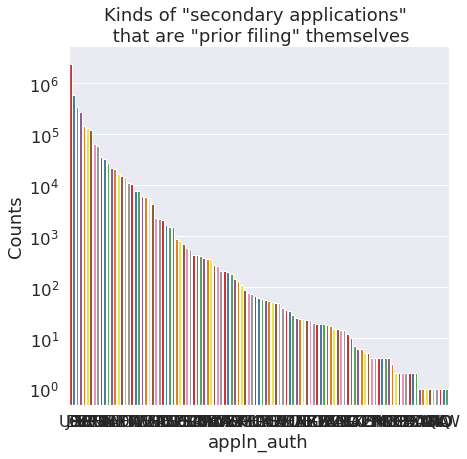

In [17]:
g = sns.catplot(x="appln_auth", y="nb_kind", ci=95, #hue="class", #col="alone", #col_wrap=2 , #ci='sd',
                data=df_result_, kind='bar', height=6, aspect=1.2, palette='Set1') #
g.set_ylabels('Counts', fontsize=18)
#g.set_xlabels('X axis', fontsize=18)
#g.set(xscale="log")

g.ax.yaxis.get_major_formatter().set_scientific(False)
g.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
g.ax.set_yscale('log')
#plt.setp(g._legend.get_title(),fontsize=20)
plt.title('Kinds of "secondary applications" \n that are "prior filing" themselves', fontsize=18) # comment this line if you are using 'col' feature
plt.show()

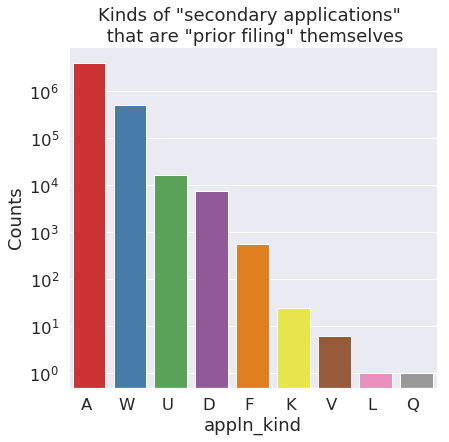

In [31]:
g = sns.catplot(x="appln_kind", y="nb_kind", ci=95, #hue="class", #col="alone", #col_wrap=2 , #ci='sd',
                data=df_result_, kind='bar', height=6, aspect=1.2, palette='Set1') #
g.set_ylabels('Counts', fontsize=18)
#g.set_xlabels('X axis', fontsize=18)
#g.set(xscale="log")

g.ax.yaxis.get_major_formatter().set_scientific(False)
g.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
g.ax.set_yscale('log')
#plt.setp(g._legend.get_title(),fontsize=20)
plt.title('Kinds of "secondary applications" \n that are "prior filing" themselves', fontsize=18) # comment this line if you are using 'col' feature
plt.show()

# 2. Implementing the algorithm

## 2.1. Adding "appln_id" that are in `'tls_201'` but not in `'tls204'`

In [6]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'processed_01'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref

In [17]:
query = """
SELECT 
        *
FROM 
        (
        SELECT appln_id AS appln_id, prior_appln_id AS prior_appln_id
        FROM `usptobias.patstat.tls204`
        )
        UNION ALL
        (
        SELECT t2.appln_id AS appln_id, t2.appln_id AS prior_appln_id
        FROM `usptobias.patstat.tls204` AS t1
        RIGHT JOIN (
                SELECT appln_id
                FROM `usptobias.patstat.tls201`
                ) AS t2 ON t1.appln_id=t2.appln_id
        WHERE t1.appln_id IS NULL
        )
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

### 2.1.2. Getting the information of the resulting table

In [23]:
# from google.cloud import bigquery
# client = bigquery.Client()
dataset_id = 'EDA_patents'
table_id = 'processed_01'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('appln_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('prior_appln_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 104,949,438 number of records in total!


In [24]:
df_.head()

,appln_id,prior_appln_id
0,308178,905661712
1,16280522,48672140
2,15854250,905016530
3,56801022,2481955
4,353466627,905362768


### Checking to see if we got the correct results

In [18]:
%%bigquery
SELECT
        COUNT(DISTINCT appln_id)
FROM
        `usptobias.EDA_patents.processed_01`
WHERE
        appln_id=prior_appln_id

,f0_
0,63914201


In [20]:
%%bigquery
SELECT
        COUNT(DISTINCT appln_id)
FROM
        `usptobias.EDA_patents.processed_01`
WHERE
        appln_id<>prior_appln_id

,f0_
0,32747162


In [21]:
%%bigquery
SELECT
        COUNT(DISTINCT appln_id)
FROM
        `usptobias.patstat.tls201`

,f0_
0,96661363


So, the sum of rows that has the same `appln_id` and `prior_appln_id` and the rows that has different ones, is equal to the total rows which exists in table `tls_201`

In [19]:
%%bigquery

SELECT
        COUNT(DISTINCT appln_id)
FROM
        `usptobias.EDA_patents.processed_01` AS t1
WHERE 
        t1.appln_id=t1.prior_appln_id
        AND EXISTS (
                SELECT DISTINCT appln_id
                FROM `usptobias.patstat.tls204` AS t2
                WHERE t1.appln_id=t2.appln_id
                )

,f0_
0,0


Also, there is no rows in `'processed_01'`, which has "appln_id"="prior_appln_id" and exists in the `"appln_id"` of table `'tls204'`

## 2.2. Replacing "prior_appln_id" by the "prior_appln_id" that they are reffering to in `'proccessed_01'` table

In [30]:
client = bigquery.Client()

# Creating Job Config
job_config = bigquery.QueryJobConfig()
#job_config.dry_run = True
job_config.use_query_cache = False
# Set configuration.query.writeDisposition
job_config.write_disposition = 'WRITE_TRUNCATE'

# Set the destination table
dataset_id = 'EDA_patents'
table_id = 'processed_02'
table_ref = client.dataset(dataset_id).table(table_id)
job_config.destination = table_ref

In [32]:
query = """
SELECT 
        t1.appln_id AS appln_id,
        t2.prior_appln_id AS prior_appln_id,
        (CASE WHEN t1.prior_appln_id=t2.prior_appln_id THEN 0 ELSE 1 END) AS is_updated
FROM
        `usptobias.EDA_patents.processed_01` AS t1
FULL OUTER JOIN (
        SELECT *
        FROM `usptobias.EDA_patents.processed_01`
        ) AS t2 ON t1.prior_appln_id=t2.appln_id
     """
# Defining the query
query_job = client.query(query, location='US', job_config=job_config)

query_job.result()

### 2.2.2. Getting the information of the resulting table

In [27]:
# from google.cloud import bigquery
# client = bigquery.Client()
dataset_id = 'EDA_patents'
table_id = 'processed_02'

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)  # API Request

# View table properties
print(table.schema)
print(table.description)
print("\nThere are {:,} number of records in total!".format(table.num_rows))

# Load the first 10 rows
rows = client.list_rows(table, max_results=10000)

#pd.DataFrame(rows)
df_ = rows.to_dataframe()

[SchemaField('appln_id', 'INTEGER', 'NULLABLE', None, ()), SchemaField('prior_appln_id', 'INTEGER', 'NULLABLE', None, ())]
None

There are 146,608,892 number of records in total!


In [28]:
df_.head()

,appln_id,prior_appln_id
0,36868957,903575633
1,474733517,474733517
2,30945181,30945181
3,905731999,905731999
4,14864013,14864013


### Checking if we got the correct results

In [ ]:
# Checking if there is any rows in 'processed_02' table which had NA in "prior_appln_id" column

In [29]:
%%bigquery
SELECT COUNT(appln_id)
FROM `usptobias.EDA_patents.processed_02`
WHERE prior_appln_id IS NULL

,f0_
0,0


So, we have no records that was in `'appln_id'` column and had no corresponding `'prior_appln_id'`. This is a double check of step `2.1`

In [33]:
# Checking how many rows are updated

In [36]:
%%bigquery
SELECT SUM(is_updated) AS nb_updates
FROM `usptobias.EDA_patents.processed_02`

,nb_updates
0,44269737


In [38]:
import pandas as pd
import re

In [80]:
txt=open('data/read.txt').read()

In [100]:
txt="""Identifier  Category1 Category2 Category3 Category4 Category5
1000           foo      bat       678         a.x       ld
1000           foo      bat       78          l.o       op
1000           coo      cat       678         p.o       kt
1001           coo      sat       89          a.x       hd
1001           foo      bat       78          l.o       op
1002           foo      bat       678         a.x       ld
1002           foo      bat       78          l.o       op
1002           coo      cat       678         p.o       kt"""

pattern = re.compile(r'^([a-zA-z|0-9]+)\s+([a-zA-z|0-9]+)\s+([a-zA-z|0-9]+)\s+([a-zA-z|0-9]+)\s+([a-zA-z|0-9|.]+)\s+([a-zA-z|0-9|.]+)$', re.MULTILINE)

In [106]:
df_ = pd.read_csv('data/read.txt', sep='\s+')

In [107]:
df_

,Identifier,Category1,Category2,Category3,Category4,Category5
0,1000,foo,bat,678,a.x,ld
1,1000,foo,bat,78,l.o,op
2,1000,coo,cat,678,p.o,kt
3,1001,coo,sat,89,a.x,hd
4,1001,foo,bat,78,l.o,op
5,1002,foo,bat,678,a.x,ld
6,1002,foo,bat,78,l.o,op
7,1002,coo,cat,678,p.o,kt


In [119]:
columns = ['Category1','Category2','Category3','Category4','Category5']

duplicate_entries = {}

for group in df_.groupby('Identifier'):
    display(group[1])
    # transforming to tuples so that it can be used as keys on a dict
    lines = [tuple(y) for y in group[1].loc[:,columns].values.tolist()]    
    key = tuple(lines) 

    if key not in duplicate_entries:
        duplicate_entries[key] = []

    duplicate_entries[key].append(group[0])

,Identifier,Category1,Category2,Category3,Category4,Category5
0,1000,foo,bat,678,a.x,ld
1,1000,foo,bat,78,l.o,op
2,1000,coo,cat,678,p.o,kt


,Identifier,Category1,Category2,Category3,Category4,Category5
3,1001,coo,sat,89,a.x,hd
4,1001,foo,bat,78,l.o,op


,Identifier,Category1,Category2,Category3,Category4,Category5
5,1002,foo,bat,678,a.x,ld
6,1002,foo,bat,78,l.o,op
7,1002,coo,cat,678,p.o,kt


In [120]:
duplicate_entries

{(('foo', 'bat', 678, 'a.x', 'ld'),
  ('foo', 'bat', 78, 'l.o', 'op'),
  ('coo', 'cat', 678, 'p.o', 'kt')): [1000, 1002],
 (('coo', 'sat', 89, 'a.x', 'hd'), ('foo', 'bat', 78, 'l.o', 'op')): [1001]}

In [118]:
duplicate_entries.values()

dict_values([[1000], [1001], [1002]])

In [125]:
%%bigquery
SELECT [1, 2, 3, 4] AS x
UNION ALL SELECT [5, 6]
UNION ALL SELECT [7, 8, 9]

,x
0,"[1, 2, 3, 4]"
1,"[5, 6]"
2,"[7, 8, 9]"


# 3. Queries for my algotirhm

## 3.1. Pieces

### example of query for generating the table

In [208]:
%%bigquery
SELECT *
FROM ( 
    SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
    SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
    SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
    SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
    SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
    SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
    SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 3 AS appln_id, 3 AS prior_appln_id
    )

,appln_id,prior_appln_id
0,4,1
1,5,1
2,6,2
3,6,3
4,7,2
5,7,3
6,8,4
7,8,5
8,9,7
9,10,8


### Example of a query that will create a table which keeps track of all "appln_id" that are pointing to more than one "prior_appln_id"

In [192]:
%%bigquery
#standardSQL
SELECT *
FROM (
    SELECT appln_id, (CASE WHEN COUNT(DISTINCT prior_appln_id)>1 THEN ARRAY_AGG(DISTINCT prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
    FROM ( 
        SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
        SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
        SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
        SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
        SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
        SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
        SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 3 AS appln_id, 3 AS prior_appln_id
        )
    GROUP BY appln_id
    HAVING prior_appln_id IS NOT NULL
    )

,appln_id,prior_appln_id
0,8,"[4, 5]"
1,6,"[2, 3]"
2,7,"[2, 3]"


### Example of changing the "prior_appln_id" of the ones that are pointing to the same list of "prior_appln_id"

In [ ]:
query="""
SELECT appln AS appln_id, prior_appln_id
FROM (
    SELECT 
        ANY_VALUE(appln_id) AS prior_appln_id, 
        ANY_VALUE(prior_appln_id) AS prior_appln, 
        (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
    FROM (
        SELECT 
            appln_id, 
            (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
        FROM 
            `usptobias.patstat.processed_01`
        GROUP BY 
            appln_id
        HAVING 
            prior_appln_id IS NOT NULL
        )
    GROUP BY TO_JSON_STRING(prior_appln_id)
    HAVING appln_id IS NOT NULL
    ), UNNEST(appln_id) AS appln
"""

table_id='processed_2'

In [219]:
%%bigquery
#standardSQL
SELECT appln AS appln_id, prior_appln_id
FROM (
    SELECT ANY_VALUE(appln_id) AS prior_appln_id, ANY_VALUE(prior_appln_id) AS prior_appln, (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
    FROM (
        SELECT appln_id, (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
        FROM ( 
            SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
            SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
            SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
            SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
            SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
            SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
            SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 3 AS appln_id, 3 AS prior_appln_id
            )
        GROUP BY appln_id
        HAVING prior_appln_id IS NOT NULL
        )
    GROUP BY TO_JSON_STRING(prior_appln_id)
    HAVING appln_id IS NOT NULL
    ), UNNEST(appln_id) AS appln

,appln_id,prior_appln_id
0,6,6
1,7,6


In [189]:
'''%%bigquery
#standardSQL
SELECT *
FROM (
    SELECT TO_JSON_STRING(prior_appln_id), (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
    FROM (
        SELECT appln_id, (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
        FROM ( 
            SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
            SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
            SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
            SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
            SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
            SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
            SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
            SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
            SELECT 3 AS appln_id, 3 AS prior_appln_id
            )
        GROUP BY appln_id
        HAVING prior_appln_id IS NOT NULL
        ), UNNEST(prior_appln_id) AS prior_appln
    GROUP BY TO_JSON_STRING(prior_appln_id)
    HAVING appln_id IS NOT NULL
    ), UNNEST(appln_id) AS appln'''

,f0_,appln_id,appln
0,"[2,3]","[6, 7]",6
1,"[2,3]","[6, 7]",7


In [215]:
%%bigquery
#standardSQL

SELECT *
FROM ( 
    SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
    SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
    SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
    SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
    SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
    SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
    SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
    SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
    SELECT 3 AS appln_id, 3 AS prior_appln_id
    ) AS t1
WHERE NOT EXISTS(
    SELECT *
    FROM(
        SELECT appln AS appln_id, prior_appln_id
        FROM (
            SELECT ANY_VALUE(appln_id) AS prior_appln_id, ANY_VALUE(prior_appln_id) AS prior_appln, (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
            FROM (
                SELECT appln_id, (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
                FROM ( 
                    SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
                    SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
                    SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
                    SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
                    SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
                    SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
                    SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
                    SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
                    SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
                    SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
                    SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
                    SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
                    SELECT 3 AS appln_id, 3 AS prior_appln_id
                    )
                GROUP BY appln_id
                HAVING prior_appln_id IS NOT NULL
                ), UNNEST(prior_appln_id) AS prior_appln
            GROUP BY TO_JSON_STRING(prior_appln_id)
            HAVING appln_id IS NOT NULL
            ), UNNEST(appln_id) AS appln
        ) AS t2
    WHERE t1.appln_id=t2.appln_id
    )


,appln_id,prior_appln_id
0,4,1
1,5,1
2,8,4
3,8,5
4,9,7
5,10,8
6,1,1
7,2,2
8,3,3


### Example of creating a table which change table "processed_01" using rows exists in table "processed_02"

In [221]:
query="""
%%bigquery
#standardSQL
SELECT DISTINCT *
FROM (
    SELECT *
    FROM `usptobias.EDA_patents.processed_01` AS t1
    WHERE NOT EXISTS(
        SELECT *
        FROM `usptobias.EDA_patents.processed_02` AS t2
        WHERE t1.appln_id=t2.appln_id
    )
    UNION ALL
    `usptobias.EDA_patents.processed_02`
"""

table_id = "processed_03"

In [225]:
%%bigquery
#standardSQL
SELECT DISTINCT *
FROM (
    SELECT *
    FROM ( 
        SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
        SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
        SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
        SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
        SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
        SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
        SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
        SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
        SELECT 3 AS appln_id, 3 AS prior_appln_id
    ) AS t1
    WHERE NOT EXISTS(
        SELECT *
        FROM(
            SELECT appln AS appln_id, prior_appln_id
            FROM (
                SELECT ANY_VALUE(appln_id) AS prior_appln_id, ANY_VALUE(prior_appln_id) AS prior_appln, (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
                FROM (
                    SELECT appln_id, (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
                    FROM ( 
                        SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
                        SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
                        SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
                        SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
                        SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
                        SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
                        SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
                        SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
                        SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
                        SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
                        SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
                        SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
                        SELECT 3 AS appln_id, 3 AS prior_appln_id
                        )
                    GROUP BY appln_id
                    HAVING prior_appln_id IS NOT NULL
                    ), UNNEST(prior_appln_id) AS prior_appln
                GROUP BY TO_JSON_STRING(prior_appln_id)
                HAVING appln_id IS NOT NULL
            ), UNNEST(appln_id) AS appln
        ) AS t2
        WHERE t1.appln_id=t2.appln_id
    )
    UNION ALL
    SELECT appln AS appln_id, prior_appln_id
    FROM (
        SELECT ANY_VALUE(appln_id) AS prior_appln_id, ANY_VALUE(prior_appln_id) AS prior_appln, (CASE WHEN COUNT(DISTINCT appln_id)>1 THEN ARRAY_AGG(DISTINCT appln_id ORDER BY appln_id) ELSE NULL END) AS appln_id
        FROM (
            SELECT appln_id, (CASE WHEN COUNT(prior_appln_id)>1 THEN ARRAY_AGG(prior_appln_id ORDER BY prior_appln_id) ELSE NULL END) AS prior_appln_id
            FROM ( 
                SELECT 4 AS appln_id, 1 AS prior_appln_id UNION ALL
                SELECT 5 AS appln_id, 1 AS prior_appln_id UNION ALL
                SELECT 6 AS appln_id, 2 AS prior_appln_id UNION ALL
                SELECT 6 AS appln_id, 3 AS prior_appln_id UNION ALL
                SELECT 7 AS appln_id, 2 AS prior_appln_id UNION ALL
                SELECT 7 AS appln_id, 3 AS prior_appln_id UNION ALL
                SELECT 8 AS appln_id, 4 AS prior_appln_id UNION ALL
                SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
                SELECT 8 AS appln_id, 5 AS prior_appln_id UNION ALL
                SELECT 9 AS appln_id, 7 AS prior_appln_id UNION ALL
                SELECT 10 AS appln_id, 8 AS prior_appln_id UNION ALL
                SELECT 1 AS appln_id, 1 AS prior_appln_id UNION ALL
                SELECT 2 AS appln_id, 2 AS prior_appln_id UNION ALL
                SELECT 3 AS appln_id, 3 AS prior_appln_id
                )
            GROUP BY appln_id
            HAVING prior_appln_id IS NOT NULL
            ), UNNEST(prior_appln_id) AS prior_appln
        GROUP BY TO_JSON_STRING(prior_appln_id)
        HAVING appln_id IS NOT NULL
        ), UNNEST(appln_id) AS appln
)



,appln_id,prior_appln_id
0,3,3
1,8,4
2,2,2
3,7,6
4,10,8
5,9,7
6,4,1
7,1,1
8,5,1
9,6,6


In [180]:
%%bigquery
#standardSQL
SELECT *
FROM `firebase-analytics-sample-data.android_dataset.app_events_20160607`
LIMIT 10

,user_dim,event_dim
0,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'round_completed', 'params': [{'key'..."
1,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'unlock_achievement', 'params': [{'k..."
2,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'item_purchased', 'params': [{'key':..."
3,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'round_completed', 'params': [{'key'..."
4,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'user_logged_in', 'params': [{'key':..."
5,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'round_completed', 'params': [{'key'..."
6,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'spend_virtual_currency', 'params': ..."
7,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'user_engagement', 'params': [{'key'..."
8,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'item_purchased', 'params': [{'key':..."
9,"{'user_id': None, 'first_open_timestamp_micros...","[{'name': 'spend_virtual_currency', 'params': ..."
